# Tree-based (Ensemble) Models and Handling Imbalanced Data [30 points]

For this problem, we will use the wine quality dataset on which the task is a binary classification of whether a given wine is of low or high quality based on different physicochemical features.
 
The dataset consists of a set of physicochemical features as inputs and the target is wine quality stored in the target column, where a value of 1 corresponds to an instance of high quality wine and -1 corresponds to an instance of low quality ones.

### Loading the data (3pts)
Load the data from library.

In [1]:
# Alternate method of loading datsets bases on Piazza question @41 (load datasets error):

import numpy as np
import pandas as pd

# Import Dataset:
data = pd.read_csv('winequality-white.csv', ';')
data['quality'] =data['quality'].replace([5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1])
data['quality'] =data['quality'].replace([1, 2, 3, 4], [1, 1, 1, 1])

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Question:** Draw the class distribution of the dataset. What are possible problems if we train a classification model directly on this dataset?

***The data is highly imbalainced.  Only about 4% of the wines are classified as high quality.  Directly training a classification model may lead to missclassifications due to data inbalance***

***For this problem, there is a very high proportion of low quality wine and not very many high quality samples. If a model was trained on this data, it would be easy for the model to fit to the low quality data and still look very accurate. If 99% of the data is one type, guessing that type every time would be 99% accurate, but the high quality samples would never be correctly identified, leading to low recall.***

Percentage of high quality observations: 0.03736218864842793%


<AxesSubplot:xlabel='quality', ylabel='count'>

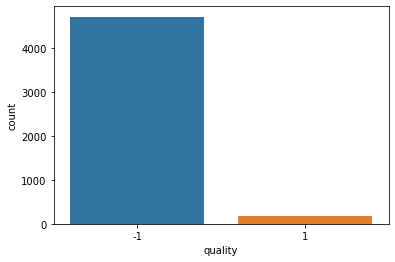

In [2]:
# import libraries for plotting class distribution
import matplotlib.pyplot as plt
import seaborn as sns

count = data['quality'].value_counts()

high_quality_ratio = count[1]/(count[1] + count[-1])
print('Percentage of high quality observations: {}%'.format(high_quality_ratio))

# color coding for 2 classes
colors = ["#0101DF", "#DF0101"]

## code to plot the class distribution. Hint: countplot in seaborn
sns.countplot(x = 'quality', data=data)

### Training and testing a Random Forest classfier directly on the data (3pts)

Let's first train a random forest classifier with default parameters using X_train and y_train and test the performance on the test data.

In [3]:
from sklearn.ensemble import RandomForestClassifier # class for random forest classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Instantiate and fit a random forest classifier to the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_test_predict = rf.predict(X_test)

## Measure and print out the accuracy and recall
test_acc = accuracy_score(y_test, rf_test_predict)

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test, rf_test_predict)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.950204081632653
Random forest classifier recall: 0.09090909090909091


**Quetion:** Compute the recall and accuracy scores of the random forest classifier. How is the gap between the accuracy and recall scores? Provide an explanation.

***The accuracy is very high (95%), likely following the tendency described above, but the recall is very low (14%). There is a large gap between the recall and accuracy score of the random forest.  This is likely because of the imbalance in the data.  Since only 3.7% of the data are high quality wines, we would be able to make a classifier highly accurate by classifying all wines as low quality, this would however have poor recall as we see here.***
***

### Data balancing via Smote (6pts)

In [4]:
from imblearn.over_sampling import SMOTE #Over sampling
import numpy as np

## Instantiate smote and balance training data only
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

count_SMOTE = y_train.value_counts()
high_quality_ratio_SMOTE = count_SMOTE[1]/(count_SMOTE[1] + count_SMOTE[-1])

## Compute and print percentage of high quality wine after balancing
print('Percentage of high quality counts in the balanced data: {}%'.format(high_quality_ratio_SMOTE*100))

Percentage of high quality counts in the balanced data: 50.0%


**Question:** Plot the distribution of balanced training data.

C:\Users\bcper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

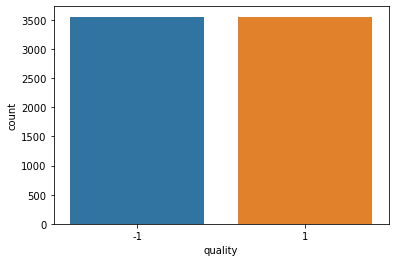

In [5]:
colors = ["#0101DF", "#DF0101"]
## plot the class distribution of training data after balanced
sns.countplot(y_train)

Let's retrain and test our random forest model on the balanced training data

In [6]:
## Instantiate random forest and train on balanced training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_test_predict = rf.predict(X_test)

test_acc = accuracy_score(y_test, rf_test_predict)

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test, rf_test_predict)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.9428571428571428
Random forest classifier recall: 0.36363636363636365


**Question:** Compute the recall and accuracy scores of the new random forest classifier. How do the accuracy and recall change compared to those without data balancing?

***The accuracy went down slightly, from 95% to 94%, but the recall nearly tripled from 12% to 36%.***

### Control complexity of the model (18pts)

#### Control the depth of decision trees in our ensemble (6pts)
By default, the decision trees in random forest are expanded until all leaves are pure or until all leaves contain less than a certain number set by min_samples_split parameter. Let's try a fixed maximum depth that the tree can expand.

In [7]:
## Instantiate model with max depth trees being 3
rf = RandomForestClassifier(max_depth = 3)
rf.fit(X_train, y_train)
rf_test_predict = rf.predict(X_test)

test_acc = accuracy_score(y_test, rf_test_predict)

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test, rf_test_predict)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.8375510204081633
Random forest classifier recall: 0.6060606060606061


**Question:** Compute the recall and accuracy scores of the new random forest classifier. How do the accuracy and recall change compared to those in the default parameter case?

***Again, accuracy decreased this time from 94% to 84%, but there was another increase in recall from 34% to 61%.***

#### Choose the number of trees in the forest (6pts)
By default, we use 10 random trees. Let's increase this number to 100

In [8]:
## Instantiate model with max depth of 3 and 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, max_depth = 3)
rf.fit(X_train, y_train)
rf_test_predict = rf.predict(X_test)

test_acc = accuracy_score(y_test, rf_test_predict)

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test, rf_test_predict)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.830204081632653
Random forest classifier recall: 0.5909090909090909


**Question:** Compute the recall and accuracy scores of the random forest classifier. How do the accuracy and recall change compared to those with 10 trees? What do the results imply about increasing the number of trees?

***This time the accuracy and recall show only a small change. This shows that increasing the number of trees from 10 to 100 does not have much of an effect for this particular model.***

#### Tree pruning by min_impurity_decrease (6pts)
By default, the tree keeps expanding until the impurity is 0. However, we can specify a minimum impurity decrease amount under which nodes in the tree stop branching. RandomForestClassifier in sklearn use min_impurity_decrease for setting this threshold. Let's try that on our problem.

In [12]:
## Instantiate model with min impurity decrease of 0.001
rf = RandomForestClassifier(min_impurity_decrease = 0.001)
rf.fit(X_train, y_train)
rf_test_predict = rf.predict(X_test)

test_acc = accuracy_score(y_test, rf_test_predict)

print('Random forest classifier accuray:', test_acc)

test_recall = recall_score(y_test, rf_test_predict)

print('Random forest classifier recall:', test_recall)

Random forest classifier accuray: 0.913469387755102
Random forest classifier recall: 0.5151515151515151


**Question:** Compute the recall and accuracy scores of the random forest classifier. How does the recall change compared to those with 10 trees and max_depth = 3?

***In this case, comparing to the 10 tree depth 3 model, both the accuracy and recall are higher. The accuracy increased from 82% to 91% while the recall increased slightly from 50% to 51%.***